# Welcome to 1st hands-on session!

## Brief outline:
- Playing with pixels
- Basic operations on images
- Histograms
- Contrast Stretching

$Note:$ The images for the exercises are given in the "images" folder!

#### Installation:
- Numpy (pip install numpy)
- Matplotlib (pip install matplotlib)
- OpenCV (pip install opencv-python)

## 1] Playing with Pixels

<font color=red>
Q1] Write a function to read, plot and save the image. [Use image.png]
</font>

#### Import all the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Function to read the image 

In [2]:
def read(path):
    
    img = cv2.imread(path)
    print("Image shape: ", img.shape)
    
    return img

#### Function to plot the image

In [3]:
def plot_image(img, title="Image"):
    
    fig=plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    
    # Note: OpenCV always reads images as BGR (not RGB!)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(rgb_img) 
    plt.show()

#### Function to save the image

In [4]:
def save(img, fname='image.jpg'):
    
    cv2.imwrite(fname, img)
    print("Successfully saved the image!")

#### Call all the above functions

Image shape:  (318, 743, 3)


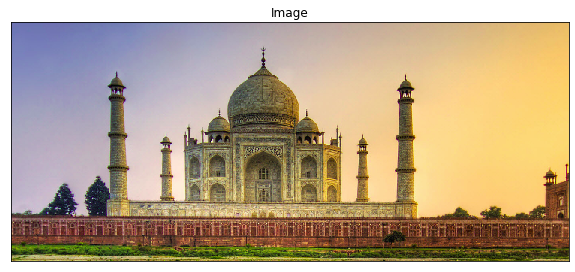

Successfully saved the image!


In [5]:
# Specify the path
path = 'images/img.png'

# Read the image
img = read(path)

# Display the image
plot_image(img)

# Save the image
save(img, fname='outputs/img1.jpg')

<font color=blue>
Q: What about gray-scale images? Convert the same image to gray-scale image.
</font>

$\textbf{Hint:}$ Use imread(path, 0) or cvtColor() 

#### Function to read a gray-scale image

In [ ]:
# Your code to read gray-scale images goes here

#### Function to plot gray-scale image

In [ ]:
# Code to plot the gray-scale images

#### Read the gray-scale image and display

In [ ]:
# Read the gray-scale image and display!

<font color=red>
Q2] Write a function to resize the given image to the specified size. [Use penguins.jpg]
</font>

$\textbf{Resize:}$ The images can be resized (or scaled) using OpenCV function ``resize()`` which takes the new x and y co-ordinates of the image and the interpolation method as inputs. Different interpolation methods can be used like cv2.INTER_AREA (for shrinking), cv2.INTER_CUBIC (slow), cv2.INTER_LINEAR (for zooming) etc. By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes. 

#### Function to resize the image

In [6]:
def resize(img, fx, fy, interpolation = cv2.INTER_CUBIC):
    
    resized_img = cv2.resize(img, (fx, fy), interpolation)

    return resized_img

#### Function to plot the images

In [7]:
def plot_images(img1, img2):

    f = plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.title('Input image')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(img1) 
    
    plt.subplot(2, 2, 2)
    plt.title('Resized image')
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)  
    plt.show()

#### Read, resize and display the images

Image shape:  (768, 1024, 3)
Resized image:  (500, 500, 3)


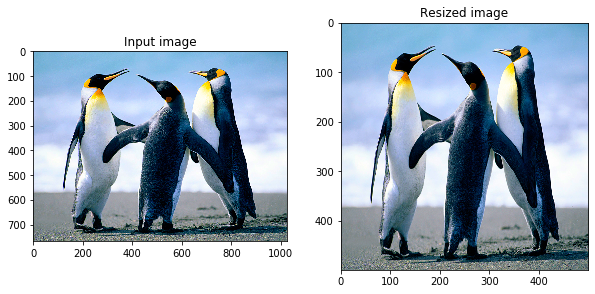

In [8]:
path = 'images/penguins.jpg'
img = read(path)

# Define the fx and fy co-ordinates to resize the image
fx=500
fy=500

# Call the function to resize the image
resized_img = resize(img, fx, fy)
print("Resized image: ", resized_img.shape)

# Display the images
plot_images(img, resized_img)

In [ ]:
#### Try different sizes and also on other images

<font color=red>
Q3] Write a function that takes a color image and finds the most frequently occurring color from the image. [Use freq_color.jpg]
</font>

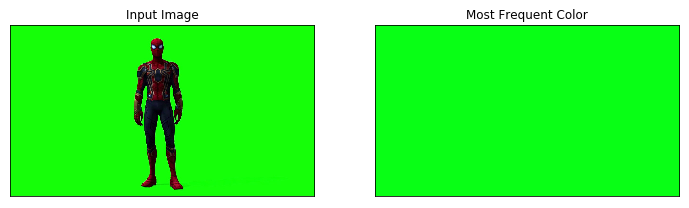

#### Hint: Use dictionary to save the count

#### Function to find the most frequently occurring color from the image

In [ ]:
#### Code goes here

#### Function to plot the image and its most frequent color

In [ ]:
#### Code to plot the input and the most frequent color image, side-by-side

#### Read and display the images

In [ ]:
#### Call the functions to read the image, find the frequent color and display the images

<font color=red>
Q4] Write a function to create the negative of an image. [Use lena.jpg]
</font>

$\textbf{Image negatives}$: Negative transform of an image is very simple! Just take the input image and invert it by subtracting the maximum possible intensity value, i.e., 255 from the image. Thats it!

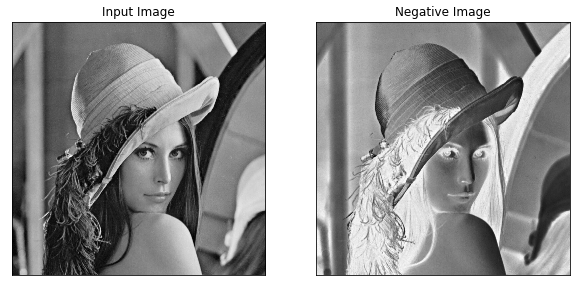

#### Function to create the negative of an image

In [ ]:
#### Code to create negative goes here

#### Function to plot the images

In [ ]:
#### Plot the input image and its negative image

#### Read the image, compute the negative and display

In [ ]:
#### Call the required functions

### Another alternative: Bitwise NOT from OpenCV!

In [18]:
def opencv_negative(img):
    
    # Use the bitwise NOT operation to find the image negative
    img_neg = cv2.bitwise_not(img)
    
    return img_neg

Description: Another alternative to form the negative image is to use the $NOT$ operation from OpenCV. The $NOT$ operation inverts every bit of the image array and thus transforms the image to its negative.

#### Negate the image and display

Image shape:  (512, 512)


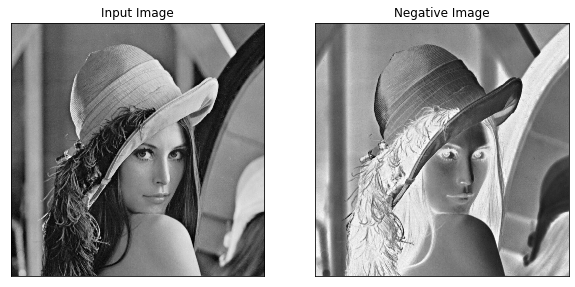

In [19]:
# Specify the path
path = 'images/lena.jpg'

# Read the image
img = read(path, grayscale=True)

# Find the negative of the image using OpenCV function
neg_img = opencv_negative(img)

# Display the image
plot_images(img, neg_img)

## 2] Basic operations on images

<font color=red>
Q1] Translate the input image by changing its x and y axis by (500, 250)
</font>

$\textbf{Translation:}$ Translation means shifting the location of the image. If $(t_x, t_y)$ are the shift along $(x, y)$ direction, then we can create the transformation matrix $M$ defined as follows:

$
\begin{equation*}
M = 
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
\end{bmatrix}
\end{equation*}
$

#### Function to translate the image

In [20]:
def translate(img, tx, ty):
    
    rows, cols, _ = img.shape

    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(img, M, (cols, rows))

    return translated_img

Description: The above function takes the image and the translation co-ordinates $(t_x, t_y)$. The translation matrix M is created and this matrix is passed to OpenCV function which translates the image.

#### Function to plot the images

In [21]:
def plot_images(img1, img2, title1, title2):

    f = plt.figure(figsize=(10, 12))
    plt.subplot(2, 2, 1)
    plt.title(title1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(img1) 
    
    plt.subplot(2, 2, 2)
    plt.title(title2)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)  
    plt.show()

#### Read, translate and display the image

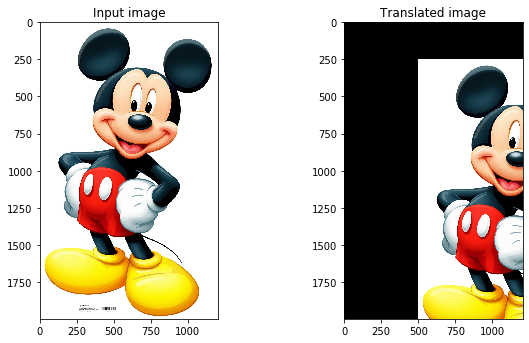

In [22]:
img = cv2.imread('images/mickey.jpg')

# Define the tx and ty co-ordinates
tx=500
ty=250

# Call the translate function
translated_img = translate(img, tx, ty)

# Display the images
plot_images(img, translated_img, "Input image", "Translated image")

In [ ]:
#### Play with different images and different translation co-ordinates

<font color=red>
Q2] Rotate the input image by an angle of 60 degrees.
</font>

$\textbf{Rotation:}$ Rotation of an image for an angle $\theta$ is achieved by the transformation matrix $M$ defined as follows:

$
\begin{equation*}
M = 
\begin{bmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta \\
\end{bmatrix}
\end{equation*}
$

#### Function to rotate the image

In [23]:
def rotate(img, theta):
    
    rows = img.shape[0]
    cols = img.shape[1]

    M = cv2.getRotationMatrix2D((cols/2,rows/2), theta, 1)
    rotated_img = cv2.warpAffine(img, M, (cols,rows))

    return rotated_img

Description: The above function takes the image and the rotation angle $\theta$ as the input. OpenCV functions are used to create the rotation matrix and rotate the given image.

#### Read, rotate and display the image

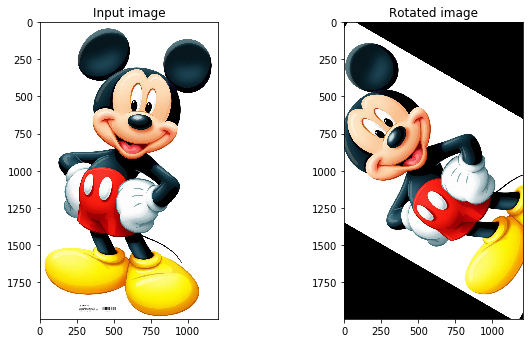

In [24]:
img = cv2.imread('images/mickey.jpg')

# Define the tx and ty co-ordinates
theta=60

# Call the translate function
rotated_img = rotate(img, theta)

# Display the images
plot_images(img, rotated_img, "Input image", "Rotated image")

In [ ]:
#### Try rotating the image by specifying different angles

<font color=red>
Q3] Perform affine transformation of the given input image.
</font>

$\textbf{Affine Transformation:}$ In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform function will create a $2x3$ matrix which is then passed to cv2.warpAffine function which transforms the image.

#### Function to perform affine transformation

In [25]:
def affine_transform(img):
    
    rows = img.shape[0]
    cols = img.shape[1]

    pts1 = np.float32([[50,50],[200,50],[50,200]])
    pts2 = np.float32([[10,100],[200,50],[100,250]])

    M = cv2.getAffineTransform(pts1,pts2)

    transformed_img = cv2.warpAffine(img,M,(cols,rows))

    return transformed_img

#### Read, perform affine transformation and display the image

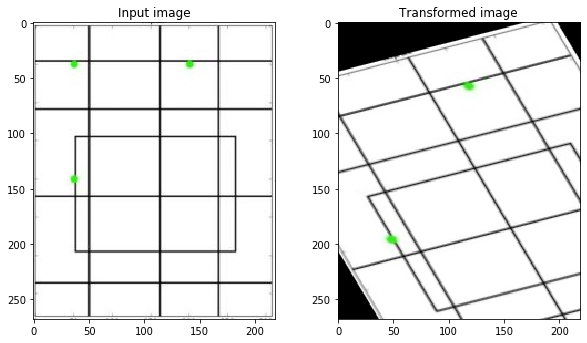

In [26]:
img = cv2.imread('images/lines.jpg')

# Call the affine transformation function
transformed_img = affine_transform(img)

# Display the images
plot_images(img, transformed_img, "Input image", "Transformed image")

## 3] Histograms

$\textbf{Histogram:}$ Histogram is a graph or a plot which gives an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255) in X-axis and the corresponding number of pixels in the image (count of pixels) on Y-axis.

<font color=red>
Q1] Compute and display the histogram of the image. [Use lena.jpg]
</font>

#### Function to compute the histogram

In [ ]:
#### Code to compute the histogram

#### Function to plot the image and its corresponding histogram

In [ ]:
#### Plotting code

#### Read the image, compute the histogram and display

In [ ]:
#### Call the functions

### Another alternative: OpenCV function - calcHist()

#### Function to compute histogram using OpenCV function

In [30]:
def opencv_compute_histogram(img):
    
    hist = cv2.calcHist([img],[0], None, [256], [0,256])
    
    return hist

Description: Following are the parameters of cv.calcHist() function:

$cv.calcHist(images, channels, mask, histSize, ranges, hist, accumulate)$

- images: it is the input image, it should be given in square brackets, ie, "[img]".
- channels: it is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, we can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask: to find histogram of full image, mask value is given as "None". But if we want to find histogram of particular region of image, we have to create a mask image for that and give it as mask.
- histSize: this represents the BIN count. For full scale, we pass [256].
- ranges: this is our RANGE. Normally, it is [0, 256].

#### Read the image, compute the histogram and display

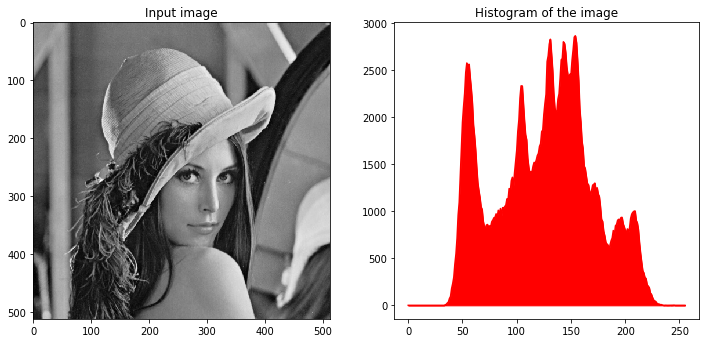

In [31]:
img = cv2.imread('images/lena.jpg', 0)

# Call the function to compute histogram
hist = opencv_compute_histogram(img)
hist = np.squeeze(hist, axis=1)

# Display the images
plot_histogram(img, hist)

## 4] Contrast Stretching

$\textbf{Contrast Stretching:}$ Contrast stretching is an image enhancement technique used to improve the contrast of the image by stretching the input intensity range to the required intensity range. The transformation function used is always linear and monotonically increasing. This technique is majorly used to reveal the details present in the image.

The formula used to compute contrast stretching is as follows:

$f(im) = a + (im - a_{low}) \times \frac{b - a}{a_{high} - a_{low}}$

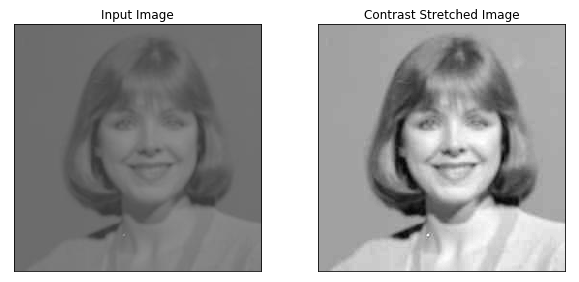

<font color=red>
Q1] Write a function which takes a grayscale image and enhances the contrast such that the resulting intensity range is [a, b]. [Use lady.jpg]
</font>

#### Function that takes a grayscale image im and the new intensity range (a, b) as input and performs contrast stretching 

In [ ]:
#### Give it a try!

#### Function to plot the images 

In [ ]:
#### Plot

#### Read the image, perform contrast stretching and plot the images

In [ ]:
#### Display

<font color=red>
Q2] Plot and compare the histograms for the input image and the contrast stretched image.
</font>

#### Function to compute the histograms of the images and plot them

In [ ]:
#### Compute and plot histograms

#### Read the image, perform contrast stretching and plot the images and their histograms

In [ ]:
#### Display

#### Another example

In [ ]:
#### Try out with child.png